In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
import pymc3 as pm

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
def my_f(f,x):
    return f(x)

def g(x):
    return np.exp(x)

my_f(lambda x: x**2, 5)

25

In [4]:
my_f(g, 0)

1.0

In [5]:
import eurostat
df = eurostat.get_data_df('hlth_cd_apr')
df.head()

,freq,mortalit,sex,icd10,unit,geo\TIME_PERIOD,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,A,PRVT,F,A00-A09,NR,AT,7.0,12.0,9.0,6.0,5.0,15.0,10.0,8.0,6.0,13.0
1,A,PRVT,F,A00-A09,NR,BE,25.0,11.0,20.0,26.0,26.0,27.0,45.0,26.0,44.0,39.0
2,A,PRVT,F,A00-A09,NR,BG,5.0,4.0,10.0,11.0,13.0,7.0,4.0,3.0,4.0,5.0
3,A,PRVT,F,A00-A09,NR,CH,14.0,14.0,9.0,9.0,5.0,13.0,13.0,11.0,14.0,10.0
4,A,PRVT,F,A00-A09,NR,CY,6.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,3.0,3.0


In [6]:
df.columns

Index(['freq', 'mortalit', 'sex', 'icd10', 'unit', 'geo\TIME_PERIOD', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [7]:
df.rename(
    {'geo\\TIME_PERIOD' : 'geo'},
    inplace = True,
    axis = 1
)

In [8]:
from country_codes import eurostat_dictionary

In [9]:
df['country'] = df['geo'].replace(eurostat_dictionary)
df.head()

,freq,mortalit,sex,icd10,unit,geo,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,country
0,A,PRVT,F,A00-A09,NR,AT,7.0,12.0,9.0,6.0,5.0,15.0,10.0,8.0,6.0,13.0,Austria
1,A,PRVT,F,A00-A09,NR,BE,25.0,11.0,20.0,26.0,26.0,27.0,45.0,26.0,44.0,39.0,Belgium
2,A,PRVT,F,A00-A09,NR,BG,5.0,4.0,10.0,11.0,13.0,7.0,4.0,3.0,4.0,5.0,Bulgaria
3,A,PRVT,F,A00-A09,NR,CH,14.0,14.0,9.0,9.0,5.0,13.0,13.0,11.0,14.0,10.0,Switzerland
4,A,PRVT,F,A00-A09,NR,CY,6.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,3.0,3.0,Cyprus


In [10]:
EU_countries = ['Belgium', 'Bulgaria', 'Czechia', 'Denmark',
'Germany (until 1990 former territory of the FRG)', 'Germany','Estonia',
'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom',
'Iceland', 'Liechtenstein', 'Norway', 'Switzerland',
'Bosnia and Herzegovina']


In [11]:
df = df[(df.country.isin(EU_countries)) &\
        (df.sex.isin(['F', 'M'])) &\
        (df.mortalit.isin(['PRVT', 'TRT'])) &\
        (df.unit == 'RT') &\
        (df.icd10 == 'TOTAL')]

In [12]:
df.head()

,freq,mortalit,sex,icd10,unit,geo,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,country
6300,A,PRVT,F,TOTAL,RT,AT,95.29,96.16,93.22,93.95,97.52,96.39,92.94,93.14,94.81,99.09,Austria
6301,A,PRVT,F,TOTAL,RT,BE,101.35,99.97,100.34,95.40,99.71,94.13,93.42,92.83,92.39,113.63,Belgium
6302,A,PRVT,F,TOTAL,RT,BG,119.32,126.17,119.29,129.04,128.32,120.14,121.87,119.05,120.05,177.73,Bulgaria
6303,A,PRVT,F,TOTAL,RT,CH,73.75,74.02,73.85,72.70,69.37,68.91,68.45,71.15,67.12,72.59,Switzerland
6304,A,PRVT,F,TOTAL,RT,CY,57.31,49.38,47.75,54.65,55.67,49.98,46.69,50.87,49.03,54.90,Cyprus


In [13]:
df.drop(
    [
        'unit',
        'icd10',
        'geo'
    ],
    axis = 1,
    inplace = True
)

In [14]:
df.head()

,freq,mortalit,sex,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,country
6300,A,PRVT,F,95.29,96.16,93.22,93.95,97.52,96.39,92.94,93.14,94.81,99.09,Austria
6301,A,PRVT,F,101.35,99.97,100.34,95.40,99.71,94.13,93.42,92.83,92.39,113.63,Belgium
6302,A,PRVT,F,119.32,126.17,119.29,129.04,128.32,120.14,121.87,119.05,120.05,177.73,Bulgaria
6303,A,PRVT,F,73.75,74.02,73.85,72.70,69.37,68.91,68.45,71.15,67.12,72.59,Switzerland
6304,A,PRVT,F,57.31,49.38,47.75,54.65,55.67,49.98,46.69,50.87,49.03,54.90,Cyprus


In [15]:
df = df.melt(
    id_vars = ['country', 'sex', 'mortalit'],
    value_vars = ["{}".format(year) for year in np.arange(2011,2021)],
    var_name = "year",
    value_name = "rate"
)

In [16]:
df.head()

,country,sex,mortalit,year,rate
0,Austria,F,PRVT,2011,95.29
1,Belgium,F,PRVT,2011,101.35
2,Bulgaria,F,PRVT,2011,119.32
3,Switzerland,F,PRVT,2011,73.75
4,Cyprus,F,PRVT,2011,57.31


Text(0.5, 0, '$\\theta$')

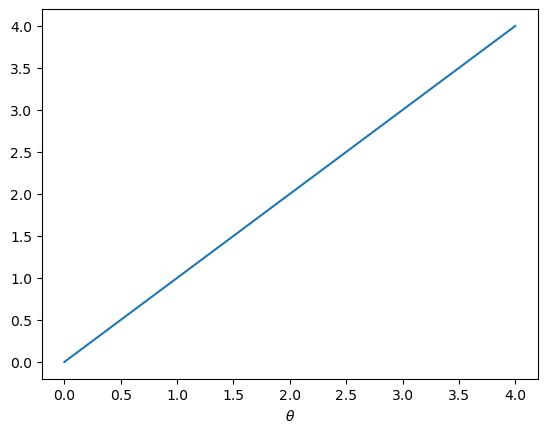

In [18]:
plt.plot(np.arange(5), np.arange(5))
plt.xlabel('$\\theta$')

In [19]:
df.set_index(['country', 'year', 'sex', 'mortalit'], inplace=True)
df.head()

,,,,rate
country,year,sex,mortalit,
Austria,2011,F,PRVT,95.29
Belgium,2011,F,PRVT,101.35
Bulgaria,2011,F,PRVT,119.32
Switzerland,2011,F,PRVT,73.75
Cyprus,2011,F,PRVT,57.31


In [22]:
df = df.unstack()
df.head()

rate       
mortalit            PRVT    TRT
country year sex               
Austria 2011 F     95.29  67.41
             M    248.50  96.86
        2012 F     96.16  69.72
             M    252.28  91.45
        2013 F     93.22  66.84

In [24]:
df.reset_index(inplace=True)

In [26]:
df.columns = [' '.join(col).strip() for col in df.columns.values]
df.head()

,country,year,sex,rate PRVT,rate TRT
0,Austria,2011,F,95.29,67.41
1,Austria,2011,M,248.50,96.86
2,Austria,2012,F,96.16,69.72
3,Austria,2012,M,252.28,91.45
4,Austria,2013,F,93.22,66.84


In [27]:
df.rename(
    {
        'rate PRVT' : 'Preventable Mortality',
        'rate TRT': 'Treatable mortality'
    },
    inplace = True,
    axis = 1
)
df.head()

,country,year,sex,Preventable Mortality,Treatable mortality
0,Austria,2011,F,95.29,67.41
1,Austria,2011,M,248.50,96.86
2,Austria,2012,F,96.16,69.72
3,Austria,2012,M,252.28,91.45
4,Austria,2013,F,93.22,66.84


In [28]:
df_n = eurostat.get_data_df(
    "nama_10_pc"
)
df_n.head()

,freq,unit,na_item,geo\TIME_PERIOD,1975,1976,1977,1978,1979,1980,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A,CLV10_EUR_HAB,B1GQ,AL,NaN,NaN,NaN,NaN,NaN,NaN,...,3330.0,3410.0,3530.0,3670.0,3830.0,3920.0,3810.0,NaN,NaN,NaN
1,A,CLV10_EUR_HAB,B1GQ,AT,NaN,NaN,NaN,NaN,NaN,NaN,...,36130.0,36140.0,36390.0,36980.0,37690.0,38070.0,35390.0,36740.0,38080.0,37430.0
2,A,CLV10_EUR_HAB,B1GQ,BE,NaN,NaN,NaN,NaN,NaN,NaN,...,33870.0,34360.0,34620.0,35050.0,35510.0,36110.0,34060.0,36250.0,37040.0,37260.0
3,A,CLV10_EUR_HAB,B1GQ,BG,NaN,NaN,NaN,NaN,NaN,NaN,...,5470.0,5700.0,5910.0,6120.0,6330.0,6630.0,6400.0,6950.0,7680.0,7850.0
4,A,CLV10_EUR_HAB,B1GQ,CH,NaN,NaN,NaN,NaN,NaN,NaN,...,59300.0,59600.0,60170.0,60420.0,61690.0,61950.0,60190.0,62950.0,64030.0,63490.0


In [31]:
df_n.drop(
    ["{}".format(year) for year in np.arange(1975, 2011)],
    axis = 1,
    inplace = True
)
df_n.head()

,freq,unit,na_item,geo\TIME_PERIOD,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A,CLV10_EUR_HAB,B1GQ,AL,3180.0,3230.0,3260.0,3330.0,3410.0,3530.0,3670.0,3830.0,3920.0,3810.0,NaN,NaN,NaN
1,A,CLV10_EUR_HAB,B1GQ,AT,36300.0,36390.0,36180.0,36130.0,36140.0,36390.0,36980.0,37690.0,38070.0,35390.0,36740.0,38080.0,37430.0
2,A,CLV10_EUR_HAB,B1GQ,BE,33460.0,33490.0,33490.0,33870.0,34360.0,34620.0,35050.0,35510.0,36110.0,34060.0,36250.0,37040.0,37260.0
3,A,CLV10_EUR_HAB,B1GQ,BG,5320.0,5390.0,5390.0,5470.0,5700.0,5910.0,6120.0,6330.0,6630.0,6400.0,6950.0,7680.0,7850.0
4,A,CLV10_EUR_HAB,B1GQ,CH,58220.0,58290.0,58650.0,59300.0,59600.0,60170.0,60420.0,61690.0,61950.0,60190.0,62950.0,64030.0,63490.0


* EU countries
* na_item B1GQ
* unit: CP_EUR_HAB
* drop: unit, na_item, geo

In [34]:
df_n['country'] = df_n['geo\\TIME_PERIOD'].replace(eurostat_dictionary)
df_n = df_n[
    (df_n.country.isin(EU_countries)) &\
    (df_n.na_item == 'B1GQ') &\
    (df_n.unit == 'CP_EUR_HAB')
]
df_n.drop(
    ['unit', 'na_item', 'geo\\TIME_PERIOD'], 
    inplace = True,
    axis = 1)
df_n.head()

,freq,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,country
1521,A,36970.0,37820.0,38210.0,38990.0,39890.0,40920.0,42000.0,43590.0,44740.0,42720.0,45270.0,49400.0,52250.0,Austria
1522,A,34060.0,34770.0,35210.0,35950.0,36960.0,37960.0,39130.0,40260.0,41660.0,39930.0,43840.0,47440.0,49540.0,Belgium
1523,A,5640.0,5780.0,5790.0,5960.0,6380.0,6840.0,7420.0,8000.0,8820.0,8880.0,10330.0,13270.0,14580.0,Bulgaria
1524,A,65190.0,66780.0,65730.0,66920.0,75530.0,74260.0,72860.0,72150.0,75150.0,75330.0,78990.0,88620.0,91780.0,Switzerland
1525,A,23340.0,22570.0,20930.0,20510.0,21170.0,22330.0,23630.0,24910.0,26280.0,24760.0,27690.0,30430.0,32100.0,Cyprus


In [35]:
df_n = df_n.melt(
    id_vars = ['country'],
    value_vars = ["{}".format(year) for year in np.arange(2011, 2021)],
    var_name = "year",
    value_name = 'GDPpercap'
)
df_n.head()

,country,year,GDPpercap
0,Austria,2011,36970.0
1,Belgium,2011,34060.0
2,Bulgaria,2011,5640.0
3,Switzerland,2011,65190.0
4,Cyprus,2011,23340.0


In [36]:
df = df.merge(
    df_n,
    how = 'left',
    left_on = ['country', 'year'],
    right_on = ['country', 'year']
)
df.head()

,country,year,sex,Preventable Mortality,Treatable mortality,GDPpercap
0,Austria,2011,F,95.29,67.41,36970.0
1,Austria,2011,M,248.50,96.86,36970.0
2,Austria,2012,F,96.16,69.72,37820.0
3,Austria,2012,M,252.28,91.45,37820.0
4,Austria,2013,F,93.22,66.84,38210.0


* obesity
* ages 15-64
* percentage of people who are obese
* quant_inc = `TOTAL`
* both sexes: M/F not total
* year = 2014

In [37]:
hlth_ehis_bm1i = eurostat.get_data_df("hlth_ehis_bm1i")
hlth_ehis_bm1i.head()

,freq,unit,bmi,quant_inc,sex,age,geo\TIME_PERIOD,2014,2019
0,A,PC,BMI18P5-24,QU1,F,TOTAL,AT,53.8,47.0
1,A,PC,BMI18P5-24,QU1,F,TOTAL,BE,43.1,42.6
2,A,PC,BMI18P5-24,QU1,F,TOTAL,BG,48.0,44.8
3,A,PC,BMI18P5-24,QU1,F,TOTAL,CY,56.3,44.2
4,A,PC,BMI18P5-24,QU1,F,TOTAL,CZ,48.5,42.9


In [38]:
hlth_ehis_bm1i['country'] = hlth_ehis_bm1i['geo\\TIME_PERIOD'].replace(eurostat_dictionary)
hlth_ehis_bm1i.columns

Index(['freq', 'unit', 'bmi', 'quant_inc', 'sex', 'age', 'geo\TIME_PERIOD',
       '2014', '2019', 'country'],
      dtype='object')

In [41]:
hlth_ehis_bm1i = hlth_ehis_bm1i[
    (hlth_ehis_bm1i.country.isin(EU_countries)) &\
    (hlth_ehis_bm1i.age == "Y15-64") &\
    (hlth_ehis_bm1i.quant_inc == "TOTAL") &\
    (hlth_ehis_bm1i.sex != "TOTAL") &\
    (hlth_ehis_bm1i.bmi == "BMI_GE30")
]
hlth_ehis_bm1i.head()

,freq,unit,bmi,quant_inc,sex,age,geo\TIME_PERIOD,2014,2019,country
49124,A,PC,BMI_GE30,TOTAL,F,Y15-64,AT,11.3,14.0,Austria
49125,A,PC,BMI_GE30,TOTAL,F,Y15-64,BE,12.9,14.2,Belgium
49126,A,PC,BMI_GE30,TOTAL,F,Y15-64,BG,11.6,9.3,Bulgaria
49127,A,PC,BMI_GE30,TOTAL,F,Y15-64,CY,9.7,11.0,Cyprus
49128,A,PC,BMI_GE30,TOTAL,F,Y15-64,CZ,16.0,15.0,Czechia


In [42]:
hlth_ehis_bm1i.drop(
    ['unit', 'bmi', 'quant_inc', 'age', 'geo\\TIME_PERIOD', '2019', 'freq'],
    axis = 1,
    inplace = True
)

In [45]:
hlth_ehis_bm1i.rename(
    {
        "2014": "obesity"
    },
    inplace = True,
    axis = 1
)

In [46]:
hlth_ehis_bm1i.head()

,freq,sex,obesity,country
49124,A,F,11.3,Austria
49125,A,F,12.9,Belgium
49126,A,F,11.6,Bulgaria
49127,A,F,9.7,Cyprus
49128,A,F,16.0,Czechia


In [49]:
df = df.merge(
    hlth_ehis_bm1i,
    how = 'left',
    on = ['country', 'sex']
)